# Stochastic Modeling in Biology:
<br/>

<!---

---
layout: post
title: Stochastic Modeling in Biology
date: 2018-04-15 10:42
tags: ETH Projects
categories: ETH
description: |
    Genetically engineered cells and organisms are being used to produce array of commonplace commercial products including drugs and materials. Biological engineering is being employed to enhance nutrition content of various foods and yield of crops. Recently, lab-grown meat represents an interesting alternative to traditional production and [synthetic biology] is being explored even by artists.
---

-->

<!---
<div class="img_row">
	<img class="col three" src="{{ site.baseurl }}/img/some_img.png" alt="" title="header_img"/>
</div>
<div class="col three caption">
Source: some.source.com
</div>
-->

## Introduction 
<br/>
Genetically engineered cells and organisms are being used to produce array of commonplace commercial products including [drugs](http://www.madehow.com/Volume-7/Insulin.html) and [materials](https://www.bio.org/articles/current-uses-synthetic-biology). Biological engineering is being employed to enhance nutrition content of various foods and yield of crops. Recently, [lab-grown meat](https://en.wikipedia.org/wiki/Cultured_meat) represents an interesting alternative to traditional production and [synthetic biology](https://www.nature.com/news/2010/100120/full/463288a.html) is being [explored even by artists](https://www.ginkgobioworks.com/2018/04/11/creative-in-residence/).  These successes are, however, just a baby steps in face of the richness and complexity of "products" nature is so adept in engineering. Like what you ask? Like you, for example.

Luckily the development is ongoing at rapid pace. We are getting finer understanding of molecular-scale processes by which the life is implemented and by extension, we are becoming more adept in exercising control over them. Biology is becoming easier to analyze and design using established engineering approaches. At different system levels, from molecular to cellular to populational, mathematical modeling and abstraction in design are becoming possible. (*If this abstraction thing is too abstract for you, think about this as if in your Arduino project (like [this one](http://www.instructables.com/id/The-EyeWriter-20/)) you had to build and debug the microcontroller first. Before you could do that, you would have to do the same for all the resistors, transistors and other elements of the board. Instead, and luckily, you just need to have the board shipped and plug it into your laptotp to boot it up. You don't have to think of all the possibly very intricate details that make it work and can focus on building some application on top of it. This is the power of abstraction when put to work.*).

This is exciting, fun and hugely relevant because, take it from ~~Elon Musk~~ Steve Jobs,:

> [...] the biggest innovations of the 21st century will be at the intersection of biology and technology.

Of course this topic is about as broad as an average statement of a politician so I will not try to cover it all here (*If you are interested in some more scientific peek into the topic, a good place to start is [this video](https://www.youtube.com/watch?v=lNttxYdGHs4) where Chris Voigt first gives general of the field and later explains his idea of programming genetic circuits the way we program computers*), rather I want to focus on the mathematical modeling part. I find it really nice how this helps me to think about the biological process in more rigorous and engineering way and believe you may benefit from this as well.

First I will give you lightweight introduction to some theory behind and then show some code I wrote for simulating simple transcription and translation processes. It is all on [github](https://github.com/martinholub) so feel free to grab it afterwards to have some fun with it.


## Biochemical Reaction Systems
<br/>

<!--
<div class="img_row">
    <a href="{{ site.baseurl }}/img/copy_numbers.png" target="_blank">
	<img class="col three" src="{{ site.baseurl }}/img/copy_numbers.png" alt="Copy Numbers" title="Copy Numbers"/></a>
</div>
<div class="col three caption">
Illustrative example of copy numbers at different levels of biochemical hierarchy. Low copy numbers, i.e. these at genome to proteome levels, are affected by stochasticity and cannot be faithfully modeled using Ordinary Differential Equation (ODE) models.
</div>
-->

In what follows we are looking at distinct biochemical species present in a cell. Additionally, these species are present in low [copy numbers](https://medical-dictionary.thefreedictionary.com/copy+number) that are significantly influenced by stochastic (random) events. You can think about this as having a a big parking lot under your kitchen window (poor you) and not having a calendar. In the morning when you make your breakfast, you can very reliably say if it is a normal working day or a public holiday based on its occupancy. Conversely, you friend, who has just two parking places within sight of his kitchen window cannot make a good guess of whether it is a public holiday or not based on if the two spots are empty. This could just as well be because somebody's child got sick (which is as random event as it gets).


In biology, there are multiple sources of such randomness, including external environmental perturbations and inherent stochasticity stemming from statistical thermodynamics of molecular reactions. To account for this, we leave the familiar realm of concentrations and enter the world of single-molecule counts. In mathematical terms this means, that instead of writing differential equations for average concentration levels, we keep track of individual reaction events that have some probability of occurring on some time interval. Conceptually, the modeling framework is depicted in the following figure:

<!--
<div class="img_row">
    <a href="{{ site.baseurl }}/img/modelling_framework.png" target="_blank">
	<img class="col three" src="{{ site.baseurl }}/img/modelling_framework.png" alt="Modeling Framework" title="Modeling Framework"/></a>
</div>
<div class="col three caption">
Conceptual modeling framework for biochemical reaction systems. <it>TX</it> and <it>TL</it> refer to transcription and translation respectively. (<a href="http://www.cds.caltech.edu/~murray/BFSwiki/index.php/Main_Page" target="_blank">Source</a>)
</div>
-->

### The Chemical Master Equation
<br/>

We want to resolve dynamics of a system at very fine scale both in space and time. Further, the system does not have equilibrium configuration. It turns out that we are interested in probability $P(\mathbf{q}, t)$ of a system to be in _microstate_ $\mathbf{q}$ at time $t$. Microstate is somewhat elusive term, but in the case of _chemical reaction systems_ this is just a vector of number of molecules of each species in the system.

Next, we assume that there are $M$ reactions $R_j$, $j = 1, ..., M$ in total and that $\boldsymbol{\nu}_j$ is a change in state (i.e. change in number of molecules, e.g. $\pm 1$ for unimolecular reaction) associated with reaction $R_j$. If we look at sufficiently small time interval, we can write $a_j (\mathbf{q})dt$ for the probability that a reaction $j$ "fires" in interval $dt$, given that current microstate of the system is $\mathbf{q}$. The $a_j (\mathbf{q})$ is called _propensity function_ and we have dropped the time dependence as we assume this is accounted for by the dependence on microstate (that itself changes in time).

The above definitions allow us to calculate the change of the probability distribution function over an interval $dt$:
$$\begin{array}{lcl}
P(\mathbf{q}, t + dt ~|~ \mathbf{q}_0, t_0) & = &
P(\mathbf{q}, t ~|~ \mathbf{q}_0, t_0)\prod_{j=1}^{M}{(1-a_j(\mathbf{q})dt)} \\
& + & \prod_{j=1}^{M}{P(\mathbf{q} - \boldsymbol{\nu}_j, t ~|~\mathbf{q}_0, t_0)(a_j(\mathbf{q} -\boldsymbol{\nu}_j)dt)} \\
& = & P(\mathbf{q}, t ~|~ \mathbf{q}_0, t_0) \\
& + & \sum_{j=1}^{M}{\bigg(P(\mathbf{q} - \boldsymbol{\nu}_j, t ~|~\mathbf{q}_0, t_0)a_j(\mathbf{q} -\boldsymbol{\nu}_j) - P(\mathbf{q}, t ~|~ \mathbf{q}_0, t_0)a_j(\mathbf{q})\bigg)dt} \\
& + & \mathscr{O}(dt^{2})\\
\end{array}$$

This may look scary but it really just states that the probability to get to state $\mathbf{q}$ is equal to probability that we are already in that state + the probability that we are one reaction away from that state and the matching reaction fires in the interval $dt$.
After dropping higher order terms in $dt$ and simplifying the notation we get:
$$\frac{\partial P}{\partial t} (\mathbf{q}, t) = \sum_{j=1}^{M}{\bigg(P(\mathbf{q} - \boldsymbol{\nu}_j, t)a_j(\mathbf{q} -\boldsymbol{\nu}_j) - P(\mathbf{q}, t)a_j(\mathbf{q})\bigg)}.$$

This is the _chemical master equation (CME)_, which is an example of _forward Kolmogorov equation_ for a discrete state, continuous time random process (phew, quite some terminology here). The discrete state here is described by the vector $\mathbf{q}$ with numbers of molecules of species in the system. To be able to calculate anything with it we will need to specify the initial condition $P(\mathbf{q}_0, t_0)$. To help you put this into bigger picture, see the two following figures that show where the CME is positioned with respect to other (more approximate) approaches to model biological system dynamics. 

<!--
<div class="img_row">
    <a href="{{ site.baseurl }}/img/overview.png" target="_blank">
	<img class="col three" src="{{ site.baseurl }}/img/modeling_approaches1.png" alt="Modeling Approaches 1" title="Modeling Approaches 1"/></a>
</div>
<div class="col three caption">
Different methods for modeling biochemical reaction systems. (<a href="http://www.cds.caltech.edu/~murray/BFSwiki/index.php/Main_Page" target="_blank">Source</a>)
</div>
-->

<!--
<div class="img_row">
    <a href="{{ site.baseurl }}/img/modeling_approaches2.png" target="_blank">
	<img class="col three" src="{{ site.baseurl }}/img/modeling_approaches2.png" alt="Modeling Approaches 2" title="Modeling Approaches 2"/></a>
</div>
<div class="col three caption">
Hierarchy of methods for modeling biochemical reactions. CME - Chemical Master Equation, SSA - Stochastic Simulation Algorithm, CLE - Chemical Langevin Equation, CFPE - Chemical Fokker-Planck Equation, RRE - Reaction Rate Equation. (<a href="https://www.annualreviews.org/doi/abs/10.1146/annurev.physchem.58.032806.104637" target="_blank">Source</a>)
</div>
-->


The main reason for why there is such a wide palette of approaches is because the chemical master equation does not have analytical solution and its numerical solution quickly becomes computationally expensive for systems with more than few distinct species. Its advantage is that building a model from set of reactions is very transparent and straightforward and this is why we will focus on precisely this approach, keeping in mind its limitations.

## The Stochastic Simulation Algorithm
<br/>
We have already mentioned that _CME_ doesn't have analytical soltion. The straightforward approach how to obtain some representative description of the system is to draw samples from the probability distribution $P(\mathbf{q}, t ~|~ \mathbf{q}_0, t_0)$ governed by the _CME_. This is  [_Monte Carlo simulation_](https://www.quora.com/What-is-an-intuitive-explanation-of-Monte-Carlo-simulations). We will be able to determine [moments of the distribution](https://en.wikipedia.org/wiki/Moment_(mathematics)) (e.g. mean and variance) by averaging over many realizations of single trajectories (under identical initial conditions).
<!-- Can actually implement stochastic collocation here!! -->

#### State update
<br/>
To implement this, we will follow approach as developed by [Daniel Gillespie](https://en.wikipedia.org/wiki/Daniel_Gillespie), i.e. the _stochastic simulation algorithm (SSA)_. Given an arbitrary state $\mathbf{q} = (n_1, n_2, ...)$, for computation of the next state we need an index of next reaction that occurs ("fires") and $\Delta t$ in which this happens. The probability that the next reaction to fire is the reaction $j$ is directly proportional to the corresponding propensity $a_j$ (intuitively, reactions with high reaction rates will occur more often). Therefore finding an index $j$ of such reaction is just matter of drawing a random integer from a weighted distribution on $[1, M]$ where the weights are given as:
$$\frac{a_j}{\sum_{i}^{M} a_i} \qquad j = 1, ..., M.$$

Note that this is equivalent to drawing a uniform random number on $[0,1]$, scaling it by the total propensity $a = \sum_{i}^{M}a_i$ and finding the first integer $j$ for which this scaled random number is less then $\sum_{i}^{j}a_i$.

#### Time update
<br/>
Finding a $\Delta t$ in which this reaction occurs is more involved. You can find the derivation at the [end of this post](#Supplementary-Note-1:-Derivation-next-time-step-parameters-in-Gillespie's-Algorithm), but for now we will take for granted that the _cumulative distribution function (CDF)_ for $\Delta t$ is:
$$\int_{0}^{\Delta t} \mathrm{f}_T(\tau) d\tau = \int_{0}^{\Delta t} a \mathrm{e}^{-a\tau}d \tau = 1 - \mathrm{e}^{-a\Delta t}.$$

This is nice because we draw samples from this distribution by drawing a random number $\xi$ on $[0, 1]$ and [inverse-sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) from the CDF. In this case, the CDF can be even inverted analytically to obtain:
$$\Delta t = \frac{1}{a} \mathrm{ln}\bigg(\frac{1}{1 - \xi}\bigg).$$

##### Python code
<br/>
If the previous two sections sounded complicated to you, have no worry, it is actually super-simple to implement them in code:

```python
def draw_ssa(propensities, total_prop):
    """Draw random samples according to prescriptions of SSA
    
    Parameters
    -------
    propensities: array, propensities of all reactions
    total_prop: float, total propensity
    
    Returns
    ---------
    idx: int, index into the state change matrix to determine updated
              state
    tau: float, time step size
    """
    
    xi1 = np.random.uniform(0,1)
    prop_rank = np.sort(np.cumsum(propensities)/total_prop)
    idx = np.int32(np.argmax(prop_rank > xi1))
    
    xi2 =  np.random.uniform(0,1)
    tau = np.float32(1/total_prop * np.log(1/(1-xi2)))
    return idx, tau
```

#### The Algorithm
<br/>

Now we are armed for the stochastic simulation algorithm that proceeds as follows:

\begin{alignat}{0}
\textbf{initialize} \\
\qquad \textrm{choose}\ \mathbf{q}_0,\ \textrm{e.g.}\ (n_{mRNA,0}, n_{protein, 0})\\
\textbf{while}\ t\ < \ t_{stop}:\\
\qquad \textrm{calculate}\ a_i(\mathbf{q}),\ \forall\ i = 1, ..., M \\
\qquad \textrm{draw}\ \xi_1 \in [0, 1]\ \textrm{and compute}\ \Delta t \\
\qquad \textrm{draw}\ \xi_2 \in [0, 1]\ \textrm{and find index}\ j \\
\qquad \textrm{update}\ \mathbf{q}\\
\end{alignat}

This algorithm is also called [Gillespie's direct method](https://www.sciencedirect.com/science/article/pii/0021999176900413?via%3Dihub) as it was D.T. Gillespie who proved that this method samples from the probability distribution governed by the CME. The method is derived based on [first principles](http://cmt.dur.ac.uk/sjc/thesis_mcg/node6.html). This makes it an exact approach to stochastic simulation, consequently, time step $\tau$ is not mere finite approximation (as in ODE models).

##### Python code
<br/>
Implementation in code is again quite simple:

```python
def ssa_routine(k, t_end, q0, nu, psi):
    """ Stochastic Simulation Algorithm

    Performs sampling from distribution governed by chemical master equation.

    Parameters
    --------------
    k: array, vector stochastic reaction constants
    t_end: int, number of steps for the simulation
    q0: array, initial number of molecules for each species
    nu: ndarray, stoichiometric matrix, with state change vectors in columns
    psi: ndarray, reactant molecularity matrix
    
    Returns
    --------------
    Q: array, all states q at times t
    time: array, vector of times t
    tot_props: array, total propensities at times t
    is_success: bool, flag indicating if simulation ran to completion
    """
    
    #Initialize arrays to store states, tick times
    time = []
    t = 0
    time.append(t)
    
    Q = []
    state = q0
    Q.append(state)
    
    while t < t_end:
        # Calculate propensities for current state
        propensities, total_prop = get_propensities(k, state, psi)
        
        # Draw random samples for update of state and time step
        idx, tau = draw_ssa(propensities, total_prop)
            
        ## Find random change in state - see theory
        state = state + nu[idx, :]
            
        ## Find random time step size - see theory
        t = t + tau

    return Q, time
```


```python
def get_propensities(rates, populations, psi):
    """Return propensities given rates and populations
    
    Computes the value of propensity for all reactions. Generalizes to various systems
    
    Parameters
    ----------
    rates: array, vector of stochastic reaction constants
    populations: array, vector of number of molecules of each species 
    
    Returns
    ---------------
    propensities: array, vector of propensiites for all reactions
    total_propensity: float, sum of all propensiites
    """
    
    # See model description  
    propensities = np.empty(psi.shape[0], dtype = np.float32)
    for r in range(psi.shape[0]):
        temp = populations ** psi[r,:]
        propensities[r] = temp.prod() * rates[r] 
        
    total_propensity = np.float32(propensities.sum())
    
    return propensities, total_propensity
```

The apparent drawback of this method is its computational complexity. As the systems become of somewhat more practical size (larger number of different species), the time step becomes very small. As on each time step, two random numbers have to be generated, this leads to significant computational cost. To circumvent this issue, approximations of the SSA (see Figures 1 and 2) become useful.

## Easy example: The Central Dogma
<br/>
To make this discussion more concrete, let's look at the minimal example of [_central dogma of molecular biology_](https://www.dnalc.org/resources/3d/central-dogma.html). This can be concisely represented as:

$$
\require{AMScd}
\begin{CD}
    DNA @>\beta_m>> mRNA @>{\beta_p \cdot n_m(t)}>> protein\\
    @. @VV{\gamma_m \cdot n_m(t)}V @VV{\gamma_p \cdot n_p(t)}V\\
    @. \varnothing @. \varnothing
\end{CD}
$$

Here the microstate is simply the vector $\mathbf{q} = (1, n_m, n_p)$, where $n_m$ and $n_p$ are the copy numbers of transcripts and proteins respectively that depend on time. The DNA is present in single copy throughout (as such, we do not need to include it in our calculations, but will do so for consistency). The propensities (or _transition probabilities_ if you will) are:

$$
a_1 = \beta_m \qquad a_2 = \gamma_m \cdot n_m \qquad a_3 = \beta_p \cdot n_m \qquad a_4 = \gamma_p \cdot n_p,$$

where $\beta_i$ corresponds to _production_ and $\gamma_i$ to _degradation_. We can see that propensity, in case of unimolecular reaction ($A \rightarrow B$) directly corresponds to the reaction rate constant (Things get only bit more complicated for bimolecular reactions as you will see later). 

Each state change vector corresponds to one reaction in the system and and together they are concatenated as columns of _stoichiometric matrix_ $\mathbf{N}$:

$$
\mathbf{N}= (\boldsymbol{\nu}_1^T, \boldsymbol{\nu}_2^T, \boldsymbol{\nu}_3^T, \boldsymbol{\nu}_4^T) = 
\begin{bmatrix}
0 & 0 & ~0 & ~0 \\
1 & 0 & -1 & ~0 \\
0 & 1 & ~0 & -1
\end{bmatrix}
$$


The dynamics of the system are described by _Chemical master equation (CME)_ for probability $P\big((n_m, n_p), t\big)$:

$$\begin{array}{lcl}
\frac{\partial P}{\partial t}\big((n_m, n_p), t\big) & = & P\big((n_m-1, n_p\big), t)\beta_m - P\big((n_m, n_p), t\big)\beta_m \\
& + & P\big((n_m+1, n_p), t\big)\gamma_m (n_m+1) - P\big((n_m, n_p), t\big)\gamma_m n_m \\
& + & P\big((n_m, n_p-1), t\big)\beta_p (n_m) - P\big((n_m, n_p), t\big)\beta_p n_m \\
& + & P\big((n_m, n_p+1), t\big)\gamma_p (n_p+1) - P\big((n_m, n_p), t\big)\gamma_p n_p \\
\end{array}$$

Phew! This has been quite some theory we have covered, let's now take a look how we can translate all this into code to simulate a real biological system.

### Simulation
<br/>

In [1]:
%load_ext autoreload
%autoreload 2
import ssa_routine as ssa
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot') # use "ggplot" style for graphs
pltparams = {'legend.fontsize':14,'axes.labelsize':18,'axes.titlesize':18,
             'xtick.labelsize':12,'ytick.labelsize':12,'figure.figsize':(7.5,7.5),}
plt.rcParams.update(pltparams)

#### Model Parameters
<br/>
We set the initial conditions as following:

$DNA$ | $mRNAs$ | $Proteins$
:---:|:---:|:---:
1 | 0 | 0

For the reaction rates we select:

$\beta_m$ |  $\beta_p$ | $\gamma_m$| $\gamma_p$
:---:|:---:|:---: | :---:
10 | 10 | 1 | 0.4

This means, for example, that the "birth" of a molecule of mRNA is 10-times more likely than its "death".

Additionally we define matrix of reactant (species entering each reaction) molecularity $\mathbf{\psi}$:

$$
\mathbf{\psi}=
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix}.
$$

We will also simulate multiple independent evolutions (paths) such that we can obtain mean evolution.

In [2]:
mp = ssa.modelParameters(k = np.array([10, 10, 1, .4]),
                         nu = np.array(([0, 1, 0], [0, 0, 1], [0,-1, 0], [0, 0,-1])),
                         psi = np.array(([1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1])),
                         q0 = np.array([1,0, 0]),
                         t_end = 100,
                         names = ["gene", "mRNA", "protein"],
                         dist = ["none", "poiss", "gauss"] )
n_paths = 30

In [3]:
np.random.seed(123)
ssa.main(mp, n_paths, do_load = 0, do_save = 0)

2018-04-15 09:33:39,299:ssa_routine:INFO: Starting simulation with n_paths=30
2018-04-15 09:33:39,315:ssa_routine:INFO: Start of simulation for path # 1 out of 30.
2018-04-15 09:33:45,030:ssa_routine:INFO: Start of simulation for path # 2 out of 30.
2018-04-15 09:33:46,053:ssa_routine:INFO: Start of simulation for path # 3 out of 30.
2018-04-15 09:33:47,061:ssa_routine:INFO: Start of simulation for path # 4 out of 30.
2018-04-15 09:33:48,301:ssa_routine:INFO: Start of simulation for path # 5 out of 30.
2018-04-15 09:33:49,408:ssa_routine:INFO: Start of simulation for path # 6 out of 30.
2018-04-15 09:33:50,345:ssa_routine:INFO: Start of simulation for path # 7 out of 30.
2018-04-15 09:33:51,370:ssa_routine:INFO: Start of simulation for path # 8 out of 30.
2018-04-15 09:33:52,326:ssa_routine:INFO: Start of simulation for path # 9 out of 30.
2018-04-15 09:33:53,283:ssa_routine:INFO: Start of simulation for path # 10 out of 30.
2018-04-15 09:33:54,360:ssa_routine:INFO: Start of simulation

,mean,var,CV
gene,1.000000,0.000000,0.000000
mRNA,10.431053,10.262420,0.307112
protein,252.870719,2027.642923,0.178073


2018-04-15 09:34:15,376:ssa_routine:INFO: Simulation finished.
2018-04-15 09:34:21,556:ssa_routine:INFO: Program execution finished.


### Results
<br/>
We obtain statistics for distribution of number of species. The mRNAs reach steady-state value of around 10 copies whereas the proteins level off at around 260 copies. The $CV$ is a [coefficient of variation](https://en.wikipedia.org/wiki/Coefficient_of_variation), normalized measure of dispersion of a distribution defined as a ratio of standard deviation to mean $CV = \frac{\sigma}{\mu}.$ 

We can look at the development of species numbers in time in the following plot in the left panel. On the right hand is then all-time histogram estimate of distribution of copy numbers together with empirical cumulative distribution function and KDE - [kernel density estimate](https://www.quora.com/What-is-kernel-density-estimation). We observe that the distribution of number of mRNAs well follows the theoretical [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) with rate parameter $\lambda = \beta_m$.

<!--
<div class="img_row">
    <a href="{{ site.baseurl }}/img/easy_example_evolution.pdf" target="_blank">
	<img class="col three" src="{{ site.baseurl }}/img/easy_example_evolution.pdf" alt="Easy Example" title="Easy Example"/></a>
</div>
<div class="col three caption">
Temporal evolution of species' copy numbers. Red line indicates mean evolution for 30 independent realizations. Right panel displays marginal distribution for all times both as empirical estimate (histogram and KDE - Kernel Density Estimate) and theoretical predictions (Poisson for mRNAs and Gaussian for proteins). Green line represents empirical cumulative distribution function.
</div>
-->


### Note on speed
<br/>
Even in this simple version, the algorithm takes quite some time to finish. I looked into it and improved the performance using [numba](https://numba.pydata.org/). You can find details on this in the [supplementary note](#Supplementary-Note-2:-Optimizing-the-sampling-in-SSA).

## Advanced Example: Noise Induced Switch
<br/>
OK, once we have the simulation and visualization functions ready and once we can draw samples reasonably fast, we can start working on a more complex model. We will look at set of reactions that will allow us to simulate effects of noise on gene expression levels. In particular we are interested in rapid switching between two significantly different levels of expression. This interesting phenomenon, referred as bistability, is often present in real biological circuits but cannot be captured by a deterministic ODE model. Whereas in previous easy example we may have as well used a deterministic ODE to obtain good estimate of time evolution, in this case we need a stochastic model to get representative picture of system dynamics.

###  The model
<br/>
$$G_1 \xrightarrow{\beta_1} G_1 + P_1 \qquad \qquad P_1 \xrightarrow{\gamma_1} \varnothing \tag{1a, 1b}$$

$$G_2 \xrightarrow{\beta_2} G_2 + 2\,P_2 \qquad \qquad P_2 \xrightarrow{\gamma_1} \varnothing \tag{2a, 2b}$$

$$\require{mhchem}
\ce{G1 + P2 <=>[{\kappa_{c1}^{+}}][{\kappa_{c1}^{-}}] \xi_{1}^{I}} \tag{3}
$$

$$\ce{G2 + P1 <=>[{\kappa_{c2}^{+}}][{\kappa_{c2}^{-}}] \xi_{2}^{I_1}} \tag{4}$$

$$\ce{\xi_{2}^{I_1} + P1 <=>[{\kappa_{c3}^{+}}][{\kappa_{c3}^{-}}] \xi_{2}^{I_2}} \tag{5}$$


* Reactions $(1a)$ and $(2a)$ represent expression of proteins $P_1$ and $P_2$ originating from genes $G_1$ and $G_2$ ($G_2$ codes for [bicistronic](https://en.wikipedia.org/wiki/Messenger_RNA#Monocistronic_versus_polycistronic_mRNA) mRNA). They reflect the fact that the genes are left unchanged and available for transcription.

* $(2a)$ and $(2b)$ correspond to protein degradation, where reaction rate is proportional to current number of molecules of given protein $n_i, ~ i=\{P_1, P_2\}$.

* In equation $(3)$, the expression of protein $P_1$ is inhibited by $P_2$ which binds to promoter region of $G_1$ and acts as *inhibitor*, forming complex $\xi_1^I$.

* The expression of from gene $G_2$ is repressed by protein $P_1$ which together form an intermediate transcription-inhibiting complex $\xi_2^{I_1}$ (reaction $(4)$)

* Protein $P_1$ is inactivated by binding to complex $\xi_2^{I_1}$ and forming $\xi_2^{I_2}$ (reaction $(5)$). Note that reactions $(4)$ and $(5)$ work antagonistically.

We will model [cooperativity](https://en.wikipedia.org/wiki/Cooperativity) of the enzyme binding sites with:

$$\kappa_{c3}^{+} = \sigma \kappa_{c2}^{+} \qquad \sigma >> 1.$$

This essentially says that the inhibitory binding to $P_1$ becomes easier after the first complexation reaction. This, at the first sight not very interesting feature of the system, is actually essential in our simulation. Repression with cooperativity is namely [one of ways how to achieve switch-like behavior](https://www.sciencedirect.com/science/article/pii/S0022519300910683) in biological systems. 

<!---
This is a very nice property of the system that can be analytically proved from deterministic ODE model. This however requires careful mathematical analysis, so we will not do it here (if you are interested checkout [this website](https://mathbio.colorado.edu/index.php/MBW:How_to_make_a_Biological_Switch)).
--->

The system in question has 7 distinct biochemical species: $[G_1, P_1, G_2, P_2, \xi_{1}^{I}, \xi_{2}^{I_1}, \xi_{2}^{I_2}]$ and comprises of in total 10 reactions (as we consider each reversible reaction as two).

##### Stochastic reaction constants
<br/>
As previously we will define an array of stochastic reaction rates $k$. We will have to be careful about units here. First, we note that for *unimolecular* reactions, the reaction rates are identical to the deterministic ones with unit ${min}^{-1}$. This is good because we are already familiar with them from previous example.

For *bimolecular* (two species) reactions, the stochastic reaction rate relates to the reaction rate of deterministic model by scaling with inverse volume $\Omega$.

$$\hat{k}_i = \frac{k_i}{\Omega}.$$ 

To obtain same units as in the case of *unimolecular* reaction, we include also scaling by Avogardo's number $N_A [mol^{-1}]$, such that $\Omega = V\,
N_A$ and $k_i = [M \cdot min^{-1}]$. $N_A$ is the old familiar $6.022\cdot10^{23} mol^{-1}.$ For the volume, we make a [ballpark estimate](http://book.bionumbers.org/how-big-is-an-e-coli-cell-and-what-is-its-mass/) for *E.coli* as a cylinder with diameter $1\mu m$ and length $2\mu m$ yielding $V \approx 1.5 \mu m^3 = 1.5\cdot 10^{-15} m^3$.

For our model, we will select the following values of stochastic reaction constants:

$\beta_1$ | $\beta_2$ | $\gamma_1$ | $\gamma_2$ |$\kappa_{c1}^{+}$ | $\kappa_{c1}^{-}$ | $\kappa_{c2}^{+} $ | $\kappa_{c2}^{-}$ |  $\kappa_{c3}^{+} $ | $\kappa_{c3}^{-}$ 
:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:
$100$ | $1000$ | $10$ | $4$ | $\frac{2}{\Omega}$ | $1$ | $\frac{4}{\Omega}$ |  $1$ | $\frac{4\sigma}{\Omega}$| $1$ 

The choice here is less arbitrary then it may look, because only certain parameters of the system will lead to noise-induced switch-like behavior. Here we require $\kappa_{c1}^{-} = \kappa_{c2}^{-} = \kappa_{c3}^{-}$, $2 \kappa_{c1}^{+} = \kappa_{c2}^{+}$ and $\sigma = 100$.

This leads to following set of propensities:

$a_1$ | $a_2$ | $a_3$ | $a_4$ |$a_5$ | $a_6$ | $a_7$ | $a_8$ |  $a_9$ | $a_{10}$ 
:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:
$\beta_1~n_{G1}$ | $\beta_2~n_{G2}$ | $\gamma_1~n_{P_1}$ | $\gamma_2~n_{P_2}$ | $\kappa_{c1}^{+}n_{P2}n_{G1}$ | $\kappa_{c1}^{-}~\xi_{1}^{I}$ | $\kappa_{c2}^{+}n_{P1}n_{G2}$ | $\kappa_{c2}^{-}~\xi_{2}^{I_1}$ |  $\kappa_{c3}^{+}n_{P1}\xi_{2}^{I_1} $ | $\kappa_{c3}^{-}~\xi_{2}^{I_2}$ 

As previously we assume, that DNA [does not degrade](https://www.quora.com/Why-is-DNA-stable-but-RNA-is-not), although the transcription from it can be inhibited by binding with respective protein (reactions $3$ and $4$).

Further we set the initial conditions as following:

$G_1$ | $P_1$ | $G_2$ | $P_2$ | $\xi_{1}^{I}$ | $\xi_{2}^{I_1}$ | $\xi_{2}^{I_2}$
:---:|:---:|:---:|:---:|:---:|:---:|:---:
1 | 10 | 1 | 10 | 0 | 0 | 0

### Simulation
<br/>
As the code in previous example was written with to be generalizable, we will be able to almost entirely reuse it, we just need to update the model parameters as follows:

In [2]:
# Model Parameters
sigma = 10
V = 1.5e-15
to_nanomolar = 1e-9
omega = 6.02214086e23*V*to_nanomolar
t_end = 30000
k = np.asarray([100, 1000, 10, 4, 2/omega, 1, 4/omega, 1, 4*sigma/omega, 1])
q0 = np.array([  1, 10,1, 10, 0, 0, 0])
names = [r'$G_1$', r'$P_1$', r'$G_2$', r'$P_2$',
         r'$\xi_1^{I}$', r'$\xi_2^{I_1}$', r'$\xi_2^{I_2}$']
dist = ["none"]*7
## State change matrix associated with each reaction
nu = np.array([ [0, 1, 0, 0, 0, 0, 0], #G1    -> G1+P1
                [0, 0, 0, 2, 0, 0, 0], #G2    -> G2+P2
                [0,-1, 0, 0, 0, 0, 0], #P1    -> _
                [0, 0, 0,-1, 0, 0, 0], #P2    -> _
                [-1,0, 0,-1, 1, 0, 0], #G1+P2 -> C1
                [1, 0, 0, 1,-1, 0, 0], #C1    -> G1+P2
                [0,-1,-1, 0, 0, 1, 0], #P1+G2 -> C2a
                [0, 1, 1, 0, 0,-1, 0], #C2a   -> P1+G2
                [0,-1, 0, 0, 0,-1, 1], #P1+C2a-> C2b 
                [0, 1, 0, 0, 0, 1,-1]  #C2b   -> P1+C2a
              ], dtype = np.int)
## Molecularity of species entering each reaction
psi = np.array([[1, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 0, 0],
                [0, 1, 0, 0, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 0],
                [1, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 1, 0, 0],
                [0, 1, 1, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 1, 0],
                [0, 1, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 0, 1]], dtype = np.int)

mp_toggle = ssa.modelParameters(k, nu, psi, q0, t_end, names, dist)

#Simulation Parameters
n_paths = 1
do_load = 0 # default 0 
do_save = 1 # default 1 
np.random.seed(123)

In [16]:
np.random.seed(123)
Qs, times, df_stats, df_plots, tot_props = \
                    ssa.simulate(mp_toggle, n_paths, 1, 0)

2018-04-13 21:25:31,689:ssa_routine:INFO: Loaded data from results~/data\out_20180413-211925.npz.
2018-04-13 21:25:31,880:ssa_routine:INFO: Calculating statistics for all species.


,mean,var,CV
G1,0.480559,0.249622,1.039667
P1,5.010690,31.772617,1.124939
G2,0.516934,0.249713,0.966686
P2,259.169254,63013.310648,0.968574
$\xi_1^{I}$,0.519441,0.249622,0.961846
$\xi_2^{I_1}$,0.006156,0.006118,12.705701
$\xi_2^{I_2}$,0.476909,0.249467,1.047299


2018-04-13 21:25:32,595:ssa_routine:INFO: Simulation finished.


In [17]:
np.random.seed(123)
ssa.visualize(Qs, times, df_stats, df_plots,tot_props, mp_toggle)

In [3]:
np.random.seed(123)
ssa.main(mp_toggle, n_paths, do_load ,do_save)

2018-04-15 09:43:40,516:ssa_routine:INFO: Starting simulation with n_paths=1
2018-04-15 09:43:40,524:ssa_routine:INFO: Start of simulation for path # 1 out of 1.
2018-04-15 09:45:07,171:ssa_routine:INFO: Relative time: 0.20.
2018-04-15 09:46:01,920:ssa_routine:INFO: Relative time: 0.40.
2018-04-15 09:48:00,145:ssa_routine:INFO: Relative time: 0.60.
2018-04-15 09:49:25,028:ssa_routine:INFO: Relative time: 0.80.
2018-04-15 09:52:52,343:ssa_routine:INFO: Data saved to file results~/data/out_20180415-095212.
2018-04-15 09:52:52,605:ssa_routine:INFO: Calculating statistics for all species.


,mean,var,CV
$G_1$,0.678624,0.218094,0.688165
$P_1$,7.137714,31.071102,0.780943
$G_2$,0.320242,0.217687,1.456927
$P_2$,159.794211,54399.408869,1.459607
$\xi_1^{I}$,0.321376,0.218094,1.453140
$\xi_2^{I_1}$,0.005893,0.005858,12.988131
$\xi_2^{I_2}$,0.673865,0.219771,0.695685


2018-04-15 09:53:29,373:ssa_routine:INFO: Simulation finished.
2018-04-15 09:54:03,614:ssa_routine:INFO: Program execution finished.


### Results
<br/>
From the statistics, we may conclude that there is not much going on in our system, but look at the following plots of temporal evolution of protein copy numbers is more interesting. We see that the system manifests bistability when there are significant and  abrupt jumps in copy numbers of both proteins. This is the expected effect of noise-induced switching that is not tractable in deterministic model. The bistable behavior is due to the fact that the copy numbers of the proteins are dependent on presence or absence of complexes $\xi_1^{I}$, $\xi_2^{I_1}$, $\xi_2^{I_2}$ that in turn acquire copy numbers only in set ${0,1}$. Such binary state is significantly affected by stochastic events (recall the previous example with parking lot).

<!--
<div class="img_row">
    <a href="{{ site.baseurl }}/img/advanced_example_evolution_P1.png" target="_blank">
	<img class="col three" src="{{ site.baseurl }}/img/advanced_example_evolution_P1.png" alt="Easy Example" title="Easy Example"/></a>
</div>
-->

<!--
<div class="img_row">
    <a href="{{ site.baseurl }}/img/advanced_example_evolution_P2.png" target="_blank">
	<img class="col three" src="{{ site.baseurl }}/img/advanced_example_evolution_P2.png" alt="Easy Example" title="Easy Example"/></a>
</div>
<div class="col three caption">
Copy number evolution for proteins 1 and 2. Both species exhibit bistability in state space that is the best seen in the marginal distribution on the right panel. Although the copy numbers are mostly around 10 and 0, this can suddenly and randomly change to 0 and 500 for proteins 1 and 2 respectively.
</div>
-->

## Conclusion
<br/>
If you have made it all the way here, pat yourself on the back. It has been quite some math we have covered and it allows to faithfully simulate dynamical systems as intriguing and complicated as genetic circuits. Now you know something about the phenomenon of bistability, which is a crucial element of building a toggle-switch, one of the elemental parts in synthetic-biology. You  also understand the important role of noise in gene expression and that the inherent stochasticity is not purely a complication in our design but can be efficiently exploited to drive patterns in molecular 'decision-making'. In addition to *Stochastic Simulation Algorithm*, you are now also aware of other, more approximate, approaches for modeling biochemical (or other stochastic) systems like *Chemical Langevin* or *Fokker-Planck* equations that can allow you to inspect systems of larger size.

Last but not least, after inspecting the code in the [github repository](), you will have seen examples of some advanced python capabilities including function decorators, just-in-time compilation and logging. 

I hope reading this post was a enjoyable for you as much as it was for me to write it. If you feel like you want to find more about the exciting field of synthetic biology, you can start with [this video](https://www.youtube.com/watch?v=lNttxYdGHs4). In any case, stay tuned for upcoming posts on cool interdisciplinary and engineering topics.

In [4]:
import gc
gc.collect()

1861

In [21]:
import pdb
pdb.pm()

> c:\users\marti\miniconda2\envs\py36\lib\site-packages\numpy\lib\shape_base.py(409)dstack()
-> return _nx.concatenate([atleast_3d(_m) for _m in tup], 2)
(Pdb) u
> c:\users\marti\documents\uni_eth\fs18\stochsim\ssa_routine.py(278)trim_paths()
-> props = np.squeeze(np.dstack(props))
(Pdb) props.shape
*** AttributeError: 'list' object has no attribute 'shape'
(Pdb) len(props)
4
(Pdb) [p.shape for p in props]
[(6192, 1), (6193, 1), (6193, 1), (6193, 1)]
(Pdb) q


In [70]:
type(mylg)

logging.Logger

In [50]:
import logging
logging.Logger.manager.loggerDict
logger = logging.getLogger("ssa_routine")
logger.handlers
ssa.teardown_logger(logger)

## Supplementary Note 1: Derivation next time step parameters in Gillespie's Algorithm
<br/>
Define $p(\tau, j ~|~ \mathbf{q}, t)d\tau$ as the probability that the reaction $j$ occurs in the time interval $[t + \tau, t + \tau + d\tau]$, then we have:
$$p(\tau, j ~|~ \mathbf{q}, t)d\tau = P_0 (\tau ~|~ \mathbf{q}, t) \cdot a_j(\mathbf{q})d\tau,$$

where $P_0 (\tau ~|~ \mathbf{q}, t)$ is the probability that _no_ reaction fires on time interval $[t, \tau + t]$. We note that starting time $t$ is arbitrary and we may set it to zero.
Corresponding probability that _no_ reaction occurs in time interval $[t + \tau, t + \tau + d\tau]$:

$$P_0 (\tau + d\tau\ |\ \mathbf{q}, t) = P_0 (\tau\ |\ \mathbf{q}, t) \cdot (1-ad\tau),$$
where $a = \sum_{i}^{M}a_i.$

It then immediately follows that:

$$\frac{d P_0}{d \tau} (\tau\ |\ \mathbf{q}, t) = -P_0 (\tau\ |\ \mathbf{q}, t) \cdot a.$$
Solving this differential equation with initial condition $P_0 (0\ |\ \mathbf{q}, t) = 1$ yields:

$$ P_0 (\tau\ |\ \mathbf{q}, t) = \mathrm{exp}(-a\tau).$$

Going back to previous definition, this gives us:
$$p(\tau, j\ |\ \mathbf{q}, t) =  \mathrm{exp}(-a\tau) \cdot a_j(\mathbf{q}).$$
To obtain index of next reaction $j$ we _marginalize_ over all $\tau$ and obtain:

$$\int_{0}^{\infty}p(\tau, j\ |\ \mathbf{q}, t) d\tau = a_j(\mathbf{q}) \int_{0}^{\infty} \mathrm{exp}(-a\tau)d\tau = \frac{a_j(\mathbf{q})}{a}.$$

Similarly, to find time that next reaction occurs, we integrate over all reactions $j$ and obtain:
$$p(\tau\ |\ \mathbf{q}, t) =  \mathrm{exp}(-a\tau) \cdot a.$$

The probability that the reaction occurs on time interval $[0, \Delta t]$ is then given by the _cumulative distribution function (CDF)_:
$$\int_{0}^{\Delta t}p(\tau\ |\ \mathbf{q}, t) d\tau = a \int_{0}^{\Delta t} \mathrm{exp}(-a\tau)d\tau = 1 - \mathrm{exp}(-a\Delta t).$$

The CDF is bounded on $[0, 1]$ and we can easily generate samples from corresponding PDF by inverse-sampling when we draw uniformly distributed numbers $\xi$ which finally yields:
$$\Delta t = \frac{1}{a} \mathrm{ln}\bigg(\frac{1}{1 - \xi}\bigg),$$
as stated before.

## Supplementary Note 2: Optimizing the sampling in SSA
<br/>
The computational burden of the direct method for SSA hits us pretty early. This can be troubling as it prolongs development cycles and limits number of species we can track. To alleviate this at least marginally, we can try to speed up our current code without making any conceptual changes to what is being computed and how (in contrast to more approximate approaches like *Chemical Langevin Equation(CLE)* and *Fokker-Planck Equation (FPE)*). 

##### Use profiler to find where the most time is spent
<br/>
First, we profile our code to see where the most time is being spend.

In [4]:
%load_ext line_profiler
import ssa_routine as ssa
import os

In [7]:
%lprun -T profiler.out -f ssa.ssa_routine ssa.ssa_routine(mp.k, mp.t_end, mp.q0, mp.nu, mp.psi)


*** Profile printout saved to text file 'profiler.out'. 


##### Use numba to speed up the calculations
<br/>
We have found out that absolute majority of the time is spent in computing propensities and drawing samples for update with a respective reaction in given time interval. Unsurprisingly, as these occur on each and every time-step. Clearly, we can get the most 'bang for the buck' by making these two steps faster. To this end, we wrap them into individual functions and use [`numba`'s](https://numba.pydata.org/) `@jit` decorator for just-in-time (JIT) compilation. This allows us to get about four-fold speed-up in calculations which I think is fair given the simplicity of implementation. This boils down to [decorating](https://wiki.python.org/moin/PythonDecorators) the function as:
```python
@numba.jit(nopython = True)
def some_function(x, y):
    return x + y
```

Here is the speed comparison:

In [53]:
%set_env NUMBA_DISABLE_JIT=1
#os.environ["NUMBA_DISABLE_JIT"] = "1"
%timeit -n 1 -r 3 ssa.simulate(mp, n_paths)

env: NUMBA_DISABLE_JIT=1


,mean,var,CV
mRNA,10.394067,9.208149,3.425306
Protein,249.466942,1694.715664,6.059888


,mean,var,CV
mRNA,10.688117,9.27994,3.508558
Protein,257.408644,1726.12629,6.195650


,mean,var,CV
mRNA,10.467691,8.531862,3.583678
Protein,255.014802,1703.876616,6.177977


13.7 s ± 225 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [19]:
%set_env NUMBA_DISABLE_JIT=0
#os.environ["NUMBA_DISABLE_JIT"] = "0"
%timeit -n 1 -r 3 ssa.simulate(mp, n_paths)

env: NUMBA_DISABLE_JIT=0


,mean,var,CV
gene,1.000000,0.000000,NaN
mRNA,10.999584,11.375058,3.261365
Protein,263.212386,2612.338753,5.149814


,mean,var,CV
gene,1.000000,0.000000,NaN
mRNA,10.532080,10.249184,3.289800
Protein,253.934811,1920.826411,5.793996


,mean,var,CV
gene,1.000000,0.000000,NaN
mRNA,10.366590,9.328903,3.394069
Protein,249.273439,1465.737686,6.511003


2.41 s ± 580 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


In [55]:
os.environ.pop("NUMBA_DISABLE_JIT")

'0'

---
### Code to save for later

$$
\require{AMScd}
\begin{CD}
    G_1 @>\beta_1>> G_1 + P_1\\
    @. @V{\gamma_1 \cdot n_{P_1}(t)}VV\\
    @. \varnothing
\end{CD} \tag{1a}
$$

$$G_1 \xrightarrow{\beta_1} P_1 \xrightarrow{\gamma_1 \cdot n_{P_1}(t)} \varnothing \tag{1b}$$

In [3]:
mp = ssa.modelParameters(k = np.asarray([(10, 1), (10, .4)]),
                        nu = np.array(([1, 0], [-1, 0], [0, 1], [0, -1]), dtype = np.int),
                        q0 = np.array([0, 0]),
                        t_end = 100,
                        names = ["mRNA", "Protein"])
n_paths = 3
np.random.seed(56)

In [4]:
#n_paths = 20
Qs, times, df_stats, df_plots = ssa.simulate(mp, n_paths)

Current time: 10.0019
Current time: 20.0138
Current time: 30.0007
Current time: 40.0076
Current time: 50.0061
Current time: 60.0113
Current time: 70.0022
Current time: 80.0051
Current time: 90.0076
Current time: 100.0021
Current time: 10.0026
Current time: 20.0212
Current time: 30.0012
Current time: 40.0010
Current time: 50.0041
Current time: 60.0017
Current time: 70.0006
Current time: 80.0107
Current time: 90.0069
Current time: 100.0006
Current time: 10.0043
Current time: 20.0040
Current time: 30.0139
Current time: 40.0013
Current time: 50.0015
Current time: 60.0115
Current time: 70.0020
Current time: 80.0004
Current time: 90.0010
Current time: 100.0046
Current time: 10.0058
Current time: 20.0001
Current time: 30.0051
Current time: 40.0380
Current time: 50.0023
Current time: 60.0030
Current time: 70.0014
Current time: 80.0040
Current time: 90.0008
Current time: 100.0027


,mean,var,CV
gene,1.000000,0.000000,NaN
mRNA,10.400500,9.455559,3.382288
Protein,247.095867,1232.313510,7.038901


In [5]:
Qs.shape

(19880, 3, 4)

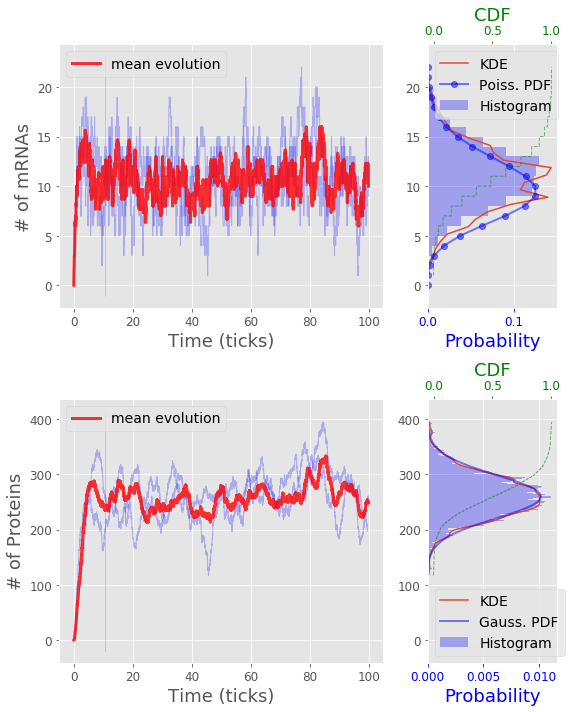

In [11]:
fig, ax = ssa.visualize(Qs, times, df_stats, df_plots, mp)